In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Recent_Contract_Awards.csv')
data.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,...,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20100628021,07/06/2010,07/06/2010,Transportation,Award,Services (other than human services),NOTICE OF AWARD OF CONCESSION AT EAST RIVER PI...,Competitive Sealed Bids,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214010,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Public Bid,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20090911004,09/18/2009,09/18/2009,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,Other (Describe below in Other Legally Mandate...,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20130415019,04/22/2013,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20110623031,06/24/2011,06/24/2011,Transportation,Award,Services (other than human services),AIRPORT BUS FRANCHISE NOTICE OF AWARD,Request for Proposals,Procurement,NaN,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(35528, 37)

In [4]:
data2 = pd.DataFrame([str(i).split('/')[-1] for i in data['StartDate']])
data2['StartYear'] = data2.astype('int')

In [5]:
data.insert(1,'StartYear',data2['StartYear'])

In [6]:
data.head()

,RequestID,StartYear,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,...,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20100628021,2010,07/06/2010,07/06/2010,Transportation,Award,Services (other than human services),NOTICE OF AWARD OF CONCESSION AT EAST RIVER PI...,Competitive Sealed Bids,Procurement,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214010,2013,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Public Bid,Procurement,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20090911004,2009,09/18/2009,09/18/2009,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20130415019,2013,04/22/2013,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20110623031,2011,06/24/2011,06/24/2011,Transportation,Award,Services (other than human services),AIRPORT BUS FRANCHISE NOTICE OF AWARD,Request for Proposals,Procurement,...,NaN,NaN,https://a856-cityrecord.nyc.gov/Search/GetFile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = data[data['StartYear'] >= 2010]
data = data[data['StartYear'] <= 2019]
print(data.shape)

(19134, 38)


In [8]:
data = data[data['ContractAmount'] > 0]
data.shape

(18198, 38)

In [9]:
data = data[data['ContractAmount'].notnull()]

In [10]:
data['ContractAmount'].sum(axis=0)

207783994327.83997

In [11]:
data.columns

Index(['RequestID', 'StartYear', 'StartDate', 'EndDate', 'AgencyName',
       'TypeOfNoticeDescription', 'CategoryDescription', 'ShortTitle',
       'SelectionMethodDescription', 'SectionName',
       'SpecialCaseReasonDescription', 'PIN', 'DueDate', 'AddressToRequest',
       'ContactName', 'ContactPhone', 'Email', 'ContractAmount', 'ContactFax',
       'AdditionalDescription1', 'AdditionalDesctription2',
       'AdditionalDescription3', 'OtherInfo1', 'OtherInfo2', 'OtherInfo3',
       'VendorName', 'VendorAddress', 'Printout1', 'Printout2', 'Printout3',
       'DocumentLinks', 'EventDate', 'EventBuildingName',
       'EventStreetAddress1', 'EventStreetAddress2', 'EventCity',
       'EventStateCode', 'EventZipCode'],
      dtype='object')

In [12]:
data['AgencyName'].unique()

array(['Transportation', 'Parks and Recreation',
       "Employees' Retirement System", 'Sanitation', 'Board of Elections',
       'Consumer Affairs', 'Housing Preservation and Development',
       'Dept Of Social Svcs/Human Resources Administration',
       'Environmental Protection', 'Correction',
       'Citywide Administrative Services', 'Police',
       'Health and Mental Hygiene', 'Design and Construction',
       'Commission on Human Rights', 'Aging', 'Finance',
       'Cultural Affairs', 'Financial Information Services Agency',
       'Chief Medical Examiner', 'New York City Police Pension Fund',
       'Buildings', 'District Attorney - Kings County',
       'Battery Park City Authority', 'Human Resources Administration',
       'Probation', 'Office of Payroll Administration',
       'Office of Labor Relations', 'City University',
       'Taxi and Limousine Commission', 'Emergency Management',
       'Civilian Complaint Review Board',
       'District Attorney - Bronx County', 

In [13]:
data_procurement = data[data['AgencyName'] ==  'Citywide Administrative Services']
data_procurement2 = data_procurement[['AgencyName','VendorName','ContractAmount']]

In [14]:
grouped_data_procurement = data_procurement2.groupby(['VendorName'],as_index=False).sum()

In [15]:
grouped_data_procurement.sort_values('ContractAmount',ascending = False,inplace=True)

In [16]:
grouped_data_procurement = grouped_data_procurement.reset_index()

In [17]:
grouped_data_procurement.drop('index',axis=1)

,VendorName,ContractAmount
0,Power Authority Of The State Of New York,6.684100e+09
1,Castle Oil Corporation,4.765222e+08
2,Genuine Parts Company,3.541815e+08
3,"Securitas Security Services USA, Inc.",3.070000e+08
4,Mack Trucks Inc,2.841531e+08
...,...,...
3149,TERI NICHOLS INSTITUTIONAL FOO,6.740000e+02
3150,U S Bank National Association,4.000000e+00
3151,The Public Group,1.000000e+00
3152,See List Below,1.000000e+00


In [18]:
print(grouped_data_procurement['ContractAmount'][0:50].sum()/grouped_data_procurement['ContractAmount'].sum())

0.6361324095814836


In [19]:
data.shape

(18198, 38)

In [20]:
data.columns

Index(['RequestID', 'StartYear', 'StartDate', 'EndDate', 'AgencyName',
       'TypeOfNoticeDescription', 'CategoryDescription', 'ShortTitle',
       'SelectionMethodDescription', 'SectionName',
       'SpecialCaseReasonDescription', 'PIN', 'DueDate', 'AddressToRequest',
       'ContactName', 'ContactPhone', 'Email', 'ContractAmount', 'ContactFax',
       'AdditionalDescription1', 'AdditionalDesctription2',
       'AdditionalDescription3', 'OtherInfo1', 'OtherInfo2', 'OtherInfo3',
       'VendorName', 'VendorAddress', 'Printout1', 'Printout2', 'Printout3',
       'DocumentLinks', 'EventDate', 'EventBuildingName',
       'EventStreetAddress1', 'EventStreetAddress2', 'EventCity',
       'EventStateCode', 'EventZipCode'],
      dtype='object')

In [21]:
data['CategoryDescription'].unique()

array(['Services (other than human services)', 'Goods',
       'Goods and Services', 'Human Services/Client Services',
       'Construction/Construction Services',
       'Construction Related Services'], dtype=object)

In [22]:
list_contracts = []

for i,j,k in zip(data['CategoryDescription'],data['ContractAmount'], data['ShortTitle']):
    if i=='Construction/Construction Services' or i=='Construction Related Services':
        list_contracts.append([i,j,k])

In [23]:
df_contracts = pd.DataFrame(list_contracts)
df_contracts.columns = ['CategoryDescription','ContractAmount','ShortTitle']
df_contracts.head()

,CategoryDescription,ContractAmount,ShortTitle
0,Construction/Construction Services,474986.0,REQUIREMENTS CONTRACT FOR UPGRADING OF UNDERGR...
1,Construction/Construction Services,3695800.0,CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...
2,Construction/Construction Services,650000.0,DORM K ELEVATOR REPLACEMENT AT ANNA M. KROSS...
3,Construction/Construction Services,470400.0,NON-EMERGENCY DEMOLITION
4,Construction Related Services,500000.0,INSTALLATION AND REPAIR OF SIDEWALK SHEDS BID#...


In [24]:
list_contracts2 = []
for l,m in zip(df_contracts['ContractAmount'], df_contracts['ShortTitle']):
    if 'WASHINGTON SQUARE PARK' in m:
        n = 'WASHINGTON SQUARE PARK'
        list_contracts2.append([l,m,n])
    elif 'THE CENTRAL PARK' in m:
        n = 'THE CENTRAL PARK'
        list_contracts2.append([l,m,n])


In [25]:
list_contracts2

[[12864125.6,
  'INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN THE CENTRAL PARK',
  'THE CENTRAL PARK'],
 [200000.0,
  'CONSTRUCTION SERVICES FOR THE CONSTRUCTION OF THE CENTRAL PARK ZOO GARAGE',
  'THE CENTRAL PARK'],
 [8939669.24,
  'WATER MAIN CONNECTION AT WASHINGTON SQUARE PARK, ETC. - BOROUGH OF MANHATTAN',
  'WASHINGTON SQUARE PARK']]

In [26]:
df_contracts2 = pd.DataFrame(list_contracts2)
df_contracts2.columns = ['ContractAmount','ShortTitle','Location']
df_contracts2.head()

,ContractAmount,ShortTitle,Location
0,12864125.60,INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN ...,THE CENTRAL PARK
1,200000.00,CONSTRUCTION SERVICES FOR THE CONSTRUCTION OF ...,THE CENTRAL PARK
2,8939669.24,WATER MAIN CONNECTION AT WASHINGTON SQUARE PAR...,WASHINGTON SQUARE PARK


In [27]:
df2 = df_contracts2.groupby('Location').sum()

In [28]:
df2.reset_index()

,Location,ContractAmount
0,THE CENTRAL PARK,13064125.60
1,WASHINGTON SQUARE PARK,8939669.24


In [29]:
df2['ContractAmount'][0]/df2['ContractAmount'][1]

1.4613656556268741

In [30]:
data.columns

Index(['RequestID', 'StartYear', 'StartDate', 'EndDate', 'AgencyName',
       'TypeOfNoticeDescription', 'CategoryDescription', 'ShortTitle',
       'SelectionMethodDescription', 'SectionName',
       'SpecialCaseReasonDescription', 'PIN', 'DueDate', 'AddressToRequest',
       'ContactName', 'ContactPhone', 'Email', 'ContractAmount', 'ContactFax',
       'AdditionalDescription1', 'AdditionalDesctription2',
       'AdditionalDescription3', 'OtherInfo1', 'OtherInfo2', 'OtherInfo3',
       'VendorName', 'VendorAddress', 'Printout1', 'Printout2', 'Printout3',
       'DocumentLinks', 'EventDate', 'EventBuildingName',
       'EventStreetAddress1', 'EventStreetAddress2', 'EventCity',
       'EventStateCode', 'EventZipCode'],
      dtype='object')

In [31]:
data4 = data[data['AgencyName']=='Citywide Administrative Services']
data4 = data4[data['CategoryDescription']=='Goods']
df_goods = data4[['StartYear','AgencyName','CategoryDescription','ContractAmount']]
df_goods.head()

,StartYear,AgencyName,CategoryDescription,ContractAmount
172,2015,Citywide Administrative Services,Goods,219456.00
173,2019,Citywide Administrative Services,Goods,424851.80
175,2016,Citywide Administrative Services,Goods,6138.00
190,2016,Citywide Administrative Services,Goods,1327263.96
204,2013,Citywide Administrative Services,Goods,331512.00


In [32]:
grouped_df_goods = df_goods.groupby('StartYear',as_index=False).sum()
grouped_df_goods.head()

,StartYear,ContractAmount
0,2010,7.040786e+08
1,2011,1.340834e+09
2,2012,7.637965e+08
3,2013,6.288650e+08
4,2014,9.481678e+08


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = grouped_df_goods[['StartYear']]
y = grouped_df_goods[['ContractAmount']]
Input = [('Scale',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X,y)
yhat = pipe.predict(X)

print('R-Squared = ',r2_score(y,yhat))

R-Squared =  0.3598764266839547


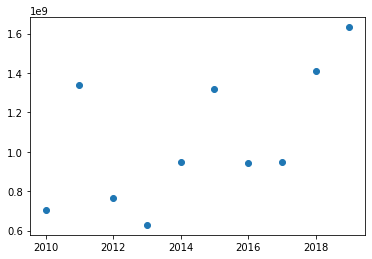

In [166]:
import matplotlib.pyplot as plt

plt.figure()
ax0 = plt.scatter(X,y)
plt.show()

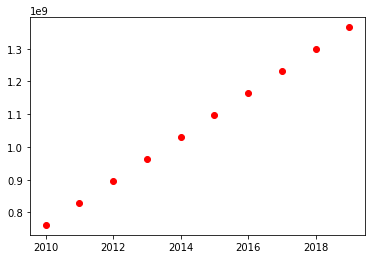

In [167]:
plt.figure()
plt.scatter(X,yhat,color='red')
plt.show()

In [36]:
data.columns

Index(['RequestID', 'StartYear', 'StartDate', 'EndDate', 'AgencyName',
       'TypeOfNoticeDescription', 'CategoryDescription', 'ShortTitle',
       'SelectionMethodDescription', 'SectionName',
       'SpecialCaseReasonDescription', 'PIN', 'DueDate', 'AddressToRequest',
       'ContactName', 'ContactPhone', 'Email', 'ContractAmount', 'ContactFax',
       'AdditionalDescription1', 'AdditionalDesctription2',
       'AdditionalDescription3', 'OtherInfo1', 'OtherInfo2', 'OtherInfo3',
       'VendorName', 'VendorAddress', 'Printout1', 'Printout2', 'Printout3',
       'DocumentLinks', 'EventDate', 'EventBuildingName',
       'EventStreetAddress1', 'EventStreetAddress2', 'EventCity',
       'EventStateCode', 'EventZipCode'],
      dtype='object')

In [37]:
number_of_contracts = pd.DataFrame(data['AgencyName'].value_counts())

In [38]:
number_of_contracts = number_of_contracts.reset_index()

In [39]:
number_of_contracts.columns = ['AgencyName','Number of Contracts']
number_of_contracts.head()

,AgencyName,Number of Contracts
0,Citywide Administrative Services,5098
1,Health and Mental Hygiene,2145
2,Dept Of Social Svcs/Human Resources Administra...,1822
3,Design and Construction,1454
4,Administration for Children's Services,892


In [40]:
df_mean_contracts = data.groupby('AgencyName',as_index=False).sum()

In [41]:
df_mean_contracts2 = df_mean_contracts[['AgencyName','ContractAmount']]
df_mean_contracts2.head()

,AgencyName,ContractAmount
0,Administration for Children's Services,6.165211e+09
1,Administrative Trials and Hearings,1.348687e+07
2,Aging,5.742536e+08
3,Battery Park City Authority,2.945157e+06
4,Board of Correction,9.926330e+04


In [42]:
df_mean_contract_merged = df_mean_contracts2.join(number_of_contracts.set_index('AgencyName'),on='AgencyName')
df_mean_contract_merged.head()

,AgencyName,ContractAmount,Number of Contracts
0,Administration for Children's Services,6.165211e+09,892
1,Administrative Trials and Hearings,1.348687e+07,17
2,Aging,5.742536e+08,548
3,Battery Park City Authority,2.945157e+06,7
4,Board of Correction,9.926330e+04,2


In [43]:
df_mean_contract_merged['Mean Amount per Contract'] = df_mean_contract_merged['ContractAmount']/df_mean_contract_merged['Number of Contracts']

In [44]:
df_mean_contract_merged  = df_mean_contract_merged.sort_values('Mean Amount per Contract', ascending=False)

In [73]:
df_mean_contract_merged['Mean Amount per Contract'][0]/df_mean_contract_merged['Mean Amount per Contract'][1]

8.712057847692325

In [132]:
data6 = data[data['StartYear']==2018]

In [133]:
data_filtered = data6[['StartYear','VendorAddress','ContractAmount']]

In [134]:
vendor_pincode = []
for address in data_filtered['VendorAddress']:
    i = str(address).split(' ')[-1]
    i = i.split('.')[0]
    vendor_pincode.append(i.split('-')[0])   

In [77]:
url = 'https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm'

data_pincode = pd.read_html(url)

In [125]:
#for zc in df_vendor_pincode['Vendor Pincode']:
ny_pc = []
for pc in data_pincode[0]['ZIP Codes']:
    pc = pc.split(',')
    for j in pc:
        j = j.strip()
        ny_pc.append(j)

In [149]:
area = []
for zc in df_vendor_pincode['Vendor Pincode']:
    if zc in ny_pc:
        area.append('NYC')
    else:
        area.append('Other')


In [152]:
data_filtered['Area'] = area
data_filtered.insert(2,'Vendor Pincode',df_vendor_pincode)

In [153]:
data_filtered.head()

,StartYear,VendorAddress,Vendor Pincode,ContractAmount,Area
156,2018,"100 Sylvan Parkway, Suite 200, Amherst, NY 14228",11001,3695800.0,Other
161,2018,800 North Glebe Road Suite 300 Arlington VA 22203,10018,7575925.0,Other
184,2018,"114 Harbour Lane, West Bayshore, NY 11706",10013,135200.0,Other
188,2018,"27-01 Queens Plaza North, Suite 800, Long Isla...",11203,5458941.0,NYC
197,2018,"22 West 27th Street, Fl # 5, New York, NY 10001",08873,90000.0,NYC


In [159]:
grouped_areawise = data_filtered.groupby('Area', as_index=False).sum()
grouped_areawise.drop('StartYear',1)

,Area,ContractAmount
0,NYC,5.872252e+09
1,Other,1.287087e+10


In [160]:
grouped_areawise['ContractAmount'][0]/(grouped_areawise['ContractAmount'][0]+grouped_areawise['ContractAmount'][1])

0.31330169907393174